In [ ]:
#Importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Leer el csv
df= pd.read_csv('/content/drive/MyDrive/train - train.csv')

# Exploración de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27656 entries, 0 to 27655
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           27656 non-null  int64 
 1   age             27656 non-null  int64 
 2   workclass       27656 non-null  object
 3   education       27656 non-null  object
 4   education.num   27656 non-null  int64 
 5   marital.status  27656 non-null  object
 6   occupation      27656 non-null  object
 7   relationship    27656 non-null  object
 8   race            27656 non-null  object
 9   sex             27656 non-null  object
 10  capital.gain    27656 non-null  int64 
 11  capital.loss    27656 non-null  int64 
 12  hours.per.week  27656 non-null  int64 
 13  native.country  27656 non-null  object
 14  income          27656 non-null  object
 15  ID              27656 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 3.4+ MB


A simple vista no hay datos nulos en el df.

Hay 7 variables numéricas y 9 categóricas.

Variables numéricas: index, edad, education.num, capital.gain, capital.loss, horas por semana, ID

Variables categóricas: clase de trabajo, educación, estado civil, ocupación, relación, raza, sexo, país de origen, ingreso

In [ ]:
df.isna().sum()

index             0
age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
ID                0
dtype: int64

In [ ]:
df.head(10)

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,<=50K,24451
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,>50K,985
2,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,>50K,30229
3,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,7107
4,27656,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K,27639
5,18132,32,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K,18126
6,26825,31,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,26809
7,32134,59,Federal-gov,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K,32111
8,2566,57,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,45,United-States,>50K,2566
9,24433,42,Local-gov,7th-8th,4,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K,24418


# **Análisis de cada variable**

Comienzo por el tratamiento de la variable target, en este caso la variable 'income', para poder utilizarla como comparación con el resto de las variables.




In [ ]:
#variable 'income'
df['income'].value_counts()

income
<=50K    20953
>50K      6703
Name: count, dtype: int64

In [ ]:
df['income'].describe()

count     27656
unique        2
top       <=50K
freq      20953
Name: income, dtype: object

In [ ]:
#Realizo label encoder en la variable target
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['income'] = label_encoder.fit_transform(df['income'])
print(df['income'].unique())


[0 1]


# **Análisis de variables categóricas**

In [ ]:
#Análisis de variables categóricas
df['workclass'].value_counts()

workclass
Private             19279
Self-emp-not-inc     2156
Local-gov            1769
?                    1539
State-gov            1117
Self-emp-inc          953
Federal-gov           822
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Hay una categoría de la variable con el nombre "?". Se interpreta como datos nulos (NaN)

In [ ]:
#Reemplazo los valores "?" por NaN para que sea más fácil operar con ellos
df['workclass'] = df['workclass'].replace('?', np.nan)
print(df['workclass'].isnull().sum())


#Qué porcentaje de los datos representan los nulos en esa columna
valores_faltantes = df['workclass'].isnull().sum()
porcentaje_faltantes = (valores_faltantes / 27656) * 100
print(porcentaje_faltantes)


1539
5.564796065953138


Como los valores nulos representan el 5.5% del total de datos de esa columna, decido imputar datos. Al ser una variable categórica, elijo imputación simple por moda.

In [ ]:
# Imputo valores faltantes en la columna 'workclass' con la moda
moda_workclass = df['workclass'].mode()[0]
df['workclass'].fillna(moda_workclass, inplace=True)
df['workclass'].value_counts()

workclass
Private             20818
Self-emp-not-inc     2156
Local-gov            1769
State-gov            1117
Self-emp-inc          953
Federal-gov           822
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Se puede constatar que reemplazó los valores faltantes por la moda, en este caso la categoría "Private", que creció en número



Ahora grafico la variable 'workclass' comparada con la variable ingresos para ver su comportamiento



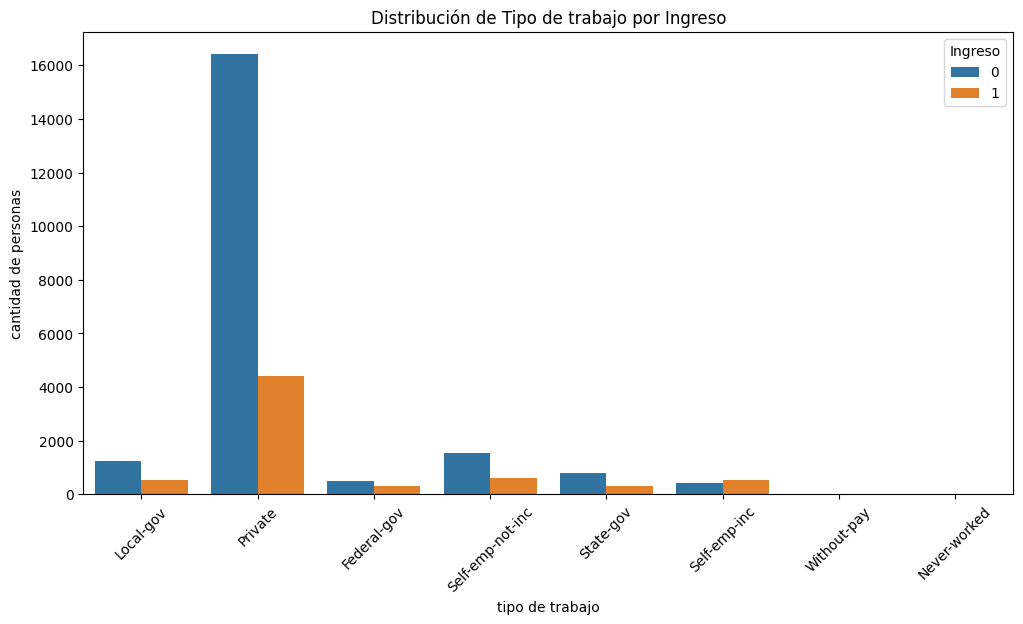

In [ ]:
#gráfico 'workclass' vs 'income'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='workclass', hue='income')
plt.title('Distribución de Tipo de trabajo por Ingreso')
plt.xlabel('tipo de trabajo')
plt.ylabel('cantidad de personas')
plt.xticks(rotation=45)
plt.legend(title='Ingreso')
plt.show()

Se puede observar que el tipo de empleo con más personas con salario mayor a 50 mil dólares anuales es del sector privado. En segúndo lugar se encuentra el trabajo por cuenta propia no incorporado, aunque la diferencia con el primer grupo es bastante grande.
Según el sitio https://smallbiztrends.com/incorporated-versus-unincorporated-self-employment/ en el año 2011 en EEUU los trabajadores por cuenta propia incorporados ganaban más del doble del salario de los trabajadores por cuenta propia no incorporados. Sin embargo en este análisis la mediana del salario no alcanzaba los 50 mil dólares anuales para el grupo self-emp-inc.  

In [ ]:
#Codifico los valores de la variable para su posterior tratamiento

label_encoder = LabelEncoder()
df['workclass_codificada'] = label_encoder.fit_transform(df['workclass'])
df['workclass_codificada'].value_counts()

workclass_codificada
3    20818
5     2156
1     1769
6     1117
4      953
0      822
7       14
2        7
Name: count, dtype: int64

In [ ]:
df['education'].value_counts()

education
HS-grad         8934
Some-college    6223
Bachelors       4583
Masters         1474
Assoc-voc       1147
11th             982
Assoc-acdm       886
10th             794
7th-8th          535
Prof-school      495
9th              429
12th             365
Doctorate        352
5th-6th          275
1st-4th          139
Preschool         43
Name: count, dtype: int64

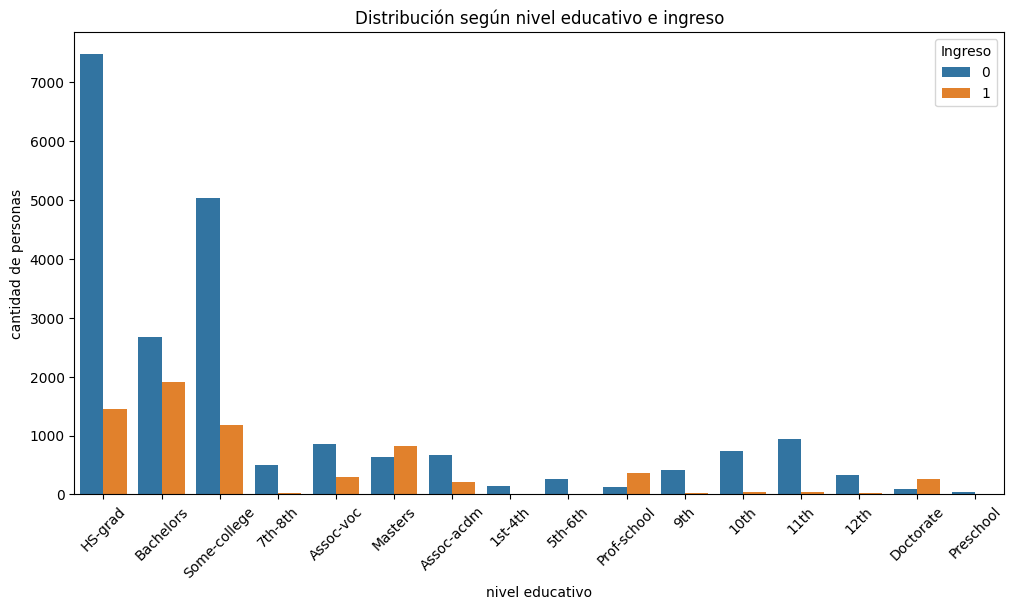

In [ ]:
#gráfico 'education' vs 'income'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', hue='income')
plt.title('Distribución según nivel educativo e ingreso')
plt.xlabel('nivel educativo')
plt.ylabel('cantidad de personas')
plt.xticks(rotation=45)
plt.legend(title='Ingreso')
plt.show()

En términos de cantidad de personas, se observa que los individuos con grado "Bachelors" son los que más perciben un ingreso igual o superior a los 50 mil dólares anuales. Las personas con grado "HS-grad" se encuentran en segundo lugar, aunque son una minoria dentro de esa categoría. En tercer lugar, son las personas con algún grado de estudio superior ('some-college') las que logran alcanzar los 50 mil dólares anuales.

Si bien en cantidad son muchos menos, los individuos con grado de master, prof-school y doctorado son los que efectivamente reciben pagas superiores a los 50 mil anuales.

Es decir que a simple vista, habría más probabilidades de conseguir un salario superior a los 50 mil anuales si se tiene un título de máster, doctorado o profesor de escuela.


In [ ]:
#Codifico variable
df['education_codificada'] = label_encoder.fit_transform(df['education'])
df['education_codificada'].value_counts()

education_codificada
11    8934
15    6223
9     4583
12    1474
8     1147
1      982
7      886
0      794
5      535
14     495
6      429
2      365
10     352
4      275
3      139
13      43
Name: count, dtype: int64

In [ ]:
df['marital.status'].value_counts()

marital.status
Married-civ-spouse       12720
Never-married             9065
Divorced                  3770
Widowed                    857
Separated                  857
Married-spouse-absent      366
Married-AF-spouse           21
Name: count, dtype: int64

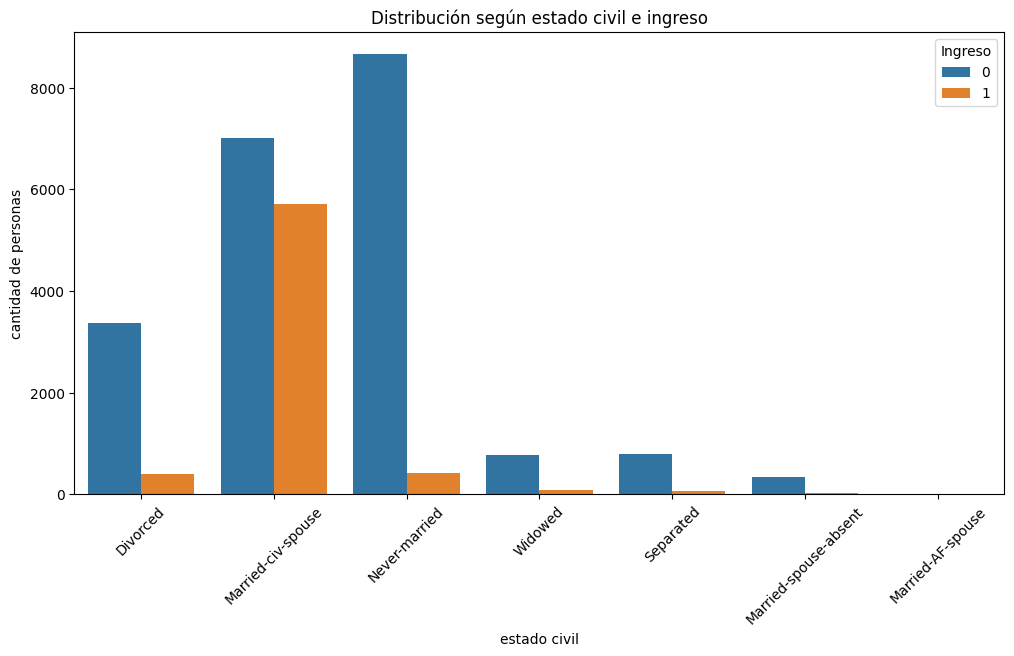

In [ ]:
#gráfico 'marital.status' vs 'income'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='marital.status', hue='income')
plt.title('Distribución según estado civil e ingreso')
plt.xlabel('estado civil')
plt.ylabel('cantidad de personas')
plt.xticks(rotation=45)
plt.legend(title='Ingreso')
plt.show()

El gráfico muestra que la categoría de casados con civiles es la que más personas con ingresos superiores o iguales a los 50 mil dólares anuales representa. En segundo lugar pero con un número muy inferior, se encuentran las personas nunca casadas y las personas divorciadas, aunque son minorías dentro de sus respectivas categorías.

In [ ]:
#Codifico variable
df['marital_status_codificada'] = label_encoder.fit_transform(df['marital.status'])
df['marital_status_codificada'].value_counts()

marital_status_codificada
2    12720
4     9065
0     3770
6      857
5      857
3      366
1       21
Name: count, dtype: int64

In [ ]:
df['occupation'].value_counts()

occupation
Prof-specialty       3539
Craft-repair         3509
Exec-managerial      3450
Adm-clerical         3237
Sales                3065
Other-service        2774
Machine-op-inspct    1692
?                    1546
Transport-moving     1378
Handlers-cleaners    1162
Farming-fishing       853
Tech-support          767
Protective-serv       557
Priv-house-serv       120
Armed-Forces            7
Name: count, dtype: int64

En el caso de la variable 'occupation', encontramos nuevamente el valor '?'. Por lo tanto se interpreta como valores nulos. Se procede a transformar el valor a Nan para su operacionalización.

Se calcula el porcentaje que representan esos valores dentro de la población. Se imputan datos por imputación simple por moda.

In [ ]:
#Reemplazo los valores "?" por NaN para que sea más fácil operar con ellos
df['occupation'] = df['occupation'].replace('?', np.nan)
print(df['occupation'].isnull().sum())


#Qué porcentaje de los datos representan los nulos en esa columna
valores_faltantes = df['occupation'].isnull().sum()
porcentaje_faltantes = (valores_faltantes / 27656) * 100
print(porcentaje_faltantes)

1546
5.5901070292160835


En este caso el porcentaje de valores nulos también es superior al 5%. Se procede con la imputación de datos.

In [ ]:
# Imputo valores faltantes en la columna 'occupation' con la moda
moda_occupation = df['occupation'].mode()[0]
df['occupation'].fillna(moda_occupation, inplace=True)
df['occupation'].value_counts()

occupation
Prof-specialty       5085
Craft-repair         3509
Exec-managerial      3450
Adm-clerical         3237
Sales                3065
Other-service        2774
Machine-op-inspct    1692
Transport-moving     1378
Handlers-cleaners    1162
Farming-fishing       853
Tech-support          767
Protective-serv       557
Priv-house-serv       120
Armed-Forces            7
Name: count, dtype: int64

Se puede corroborar que los valores nulos fueron reemplazados por el valor Prof-speciality.


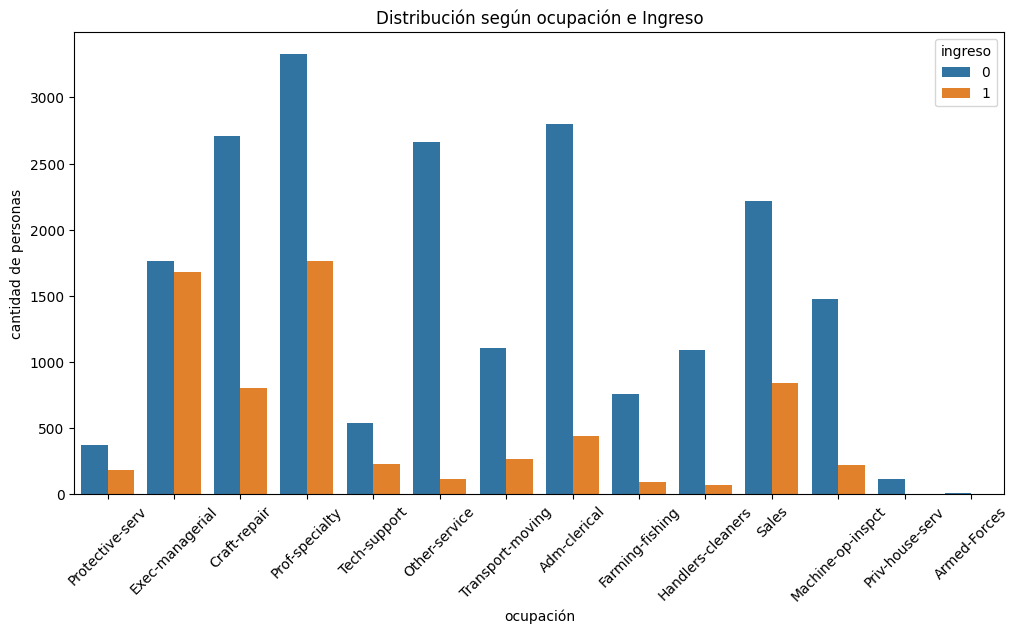

In [ ]:
#gráfico 'occupation' vs 'income'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='occupation', hue='income')
plt.title('Distribución según ocupación e Ingreso')
plt.xlabel('ocupación')
plt.ylabel('cantidad de personas')
plt.xticks(rotation=45)
plt.legend(title='ingreso')
plt.show()

El gráfico muestra que las personas profesionales especialistas y los gerentes ejecutivos son las categorías con más personas con salarios encima de los 50 mil anuales.

Las personas que se dedican a las reparaciones artesanales y a las ventas son las que siguen en la lista.



In [ ]:
#Codifico variable
df['occupation_codificada'] = label_encoder.fit_transform(df['occupation'])
df['occupation_codificada'].value_counts()

occupation_codificada
9     5085
2     3509
3     3450
0     3237
11    3065
7     2774
6     1692
13    1378
5     1162
4      853
12     767
10     557
8      120
1        7
Name: count, dtype: int64

In [ ]:
df['relationship'].value_counts()

relationship
Husband           11208
Not-in-family      7001
Own-child          4333
Unmarried          2944
Wife               1333
Other-relative      837
Name: count, dtype: int64

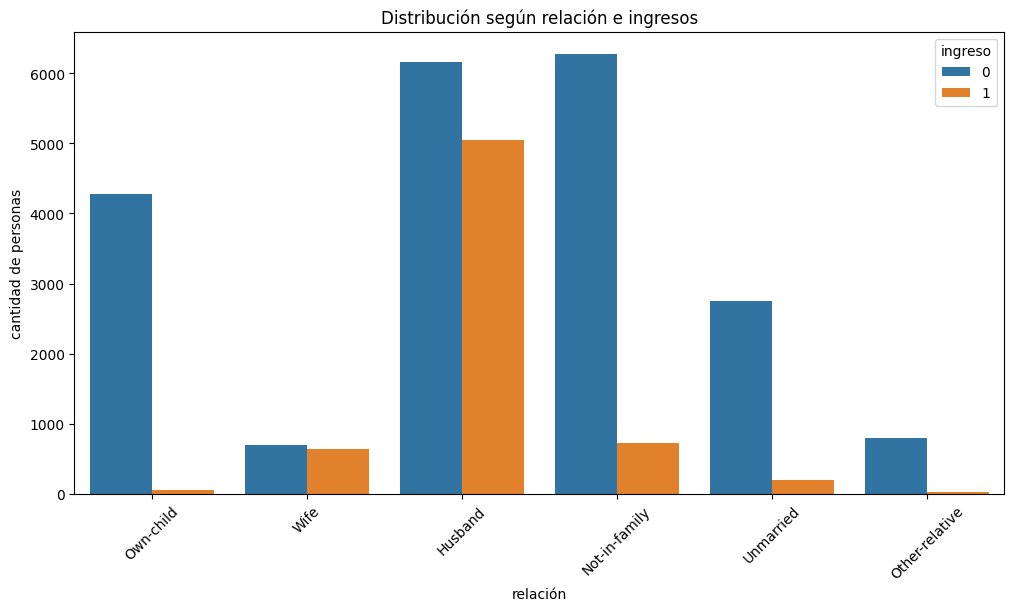

In [ ]:
#gráfico 'relationship' vs 'income'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='relationship', hue='income')
plt.title('Distribución según relación e ingresos')
plt.xlabel('relación')
plt.ylabel('cantidad de personas')
plt.xticks(rotation=45)
plt.legend(title='ingreso')
plt.show()

En las personas encuestadas, los maridos son los que representan un número mayor de personas con sueldos por encima de los 50 mil anuales, seguidos de las personas que no tienen familia propia, y las esposas.

In [ ]:
#Codifico variable
df['relationship_codificada'] = label_encoder.fit_transform(df['relationship'])
df['relationship_codificada'].value_counts()

relationship_codificada
0    11208
1     7001
3     4333
4     2944
5     1333
2      837
Name: count, dtype: int64

In [ ]:
df['race'].value_counts()

race
White                 23621
Black                  2649
Asian-Pac-Islander      886
Amer-Indian-Eskimo      263
Other                   237
Name: count, dtype: int64

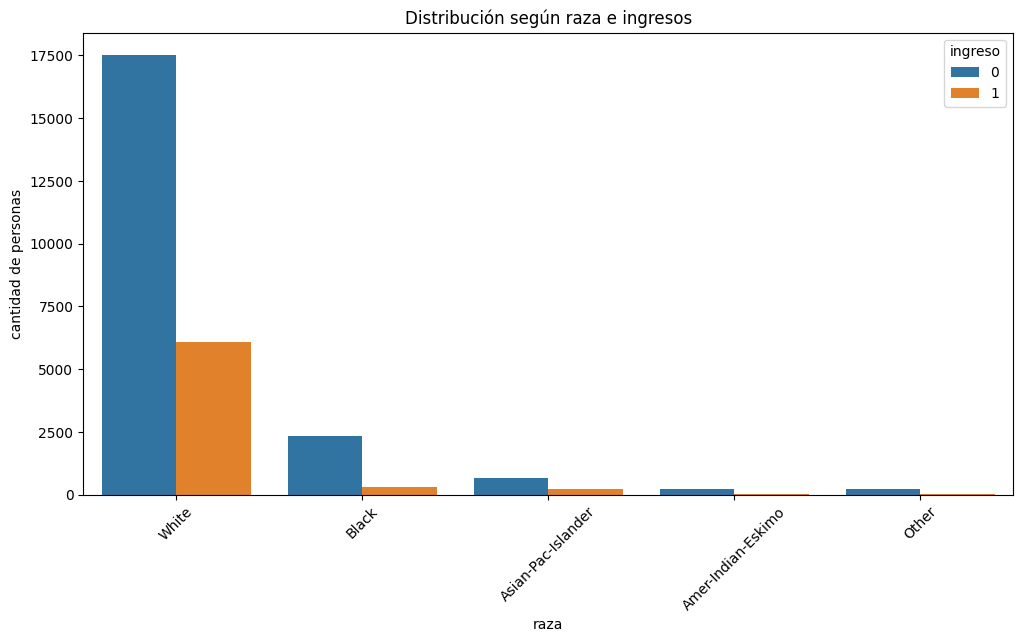

In [ ]:
#gráfico 'race' vs 'income'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='race', hue='income')
plt.title('Distribución según raza e ingresos')
plt.xlabel('raza')
plt.ylabel('cantidad de personas')
plt.xticks(rotation=45)
plt.legend(title='ingreso')
plt.show()

En este gráfico se puede observar que la mayoría de las personas encuestadas eran de raza blanca, y en su grupo se encontraron la mayoría de los que recibieron ingresos mayores a 50 mil dólares anuales.

In [ ]:
#Codifico variable
df['race_codificada'] = label_encoder.fit_transform(df['race'])
df['race_codificada'].value_counts()

race_codificada
4    23621
2     2649
1      886
0      263
3      237
Name: count, dtype: int64

In [ ]:
df['sex'].value_counts()

sex
Male      18521
Female     9135
Name: count, dtype: int64

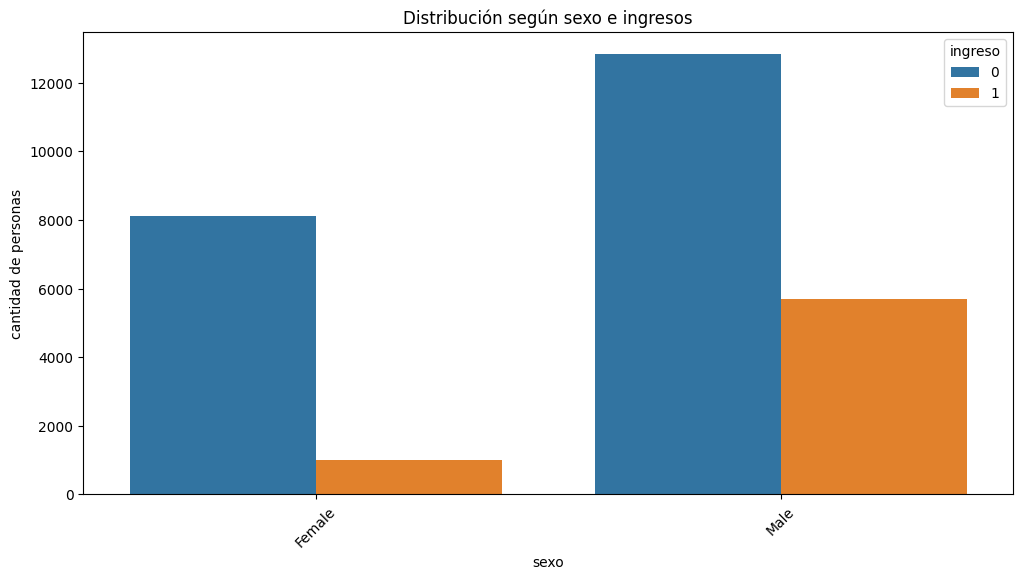

In [ ]:
#gráfico 'sex' vs 'income'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='sex', hue='income')
plt.title('Distribución según sexo e ingresos')
plt.xlabel('sexo')
plt.ylabel('cantidad de personas')
plt.xticks(rotation=45)
plt.legend(title='ingreso')
plt.show()

Se evidencia que dentro del sexo masculino existe mayor número de personas que alcanzan un salario superior a los 50 mil dólares anuales


In [ ]:
#Codifico variable
df['sex_codificada'] = label_encoder.fit_transform(df['sex'])
df['sex_codificada'].value_counts()

sex_codificada
1    18521
0     9135
Name: count, dtype: int64

In [ ]:
df['native.country'].value_counts()

native.country
United-States                 24811
Mexico                          532
?                               504
Philippines                     167
Germany                         108
Canada                           97
Puerto-Rico                      94
El-Salvador                      94
India                            84
England                          78
Cuba                             77
Jamaica                          72
China                            65
Dominican-Republic               64
South                            64
Italy                            61
Vietnam                          56
Japan                            56
Poland                           48
Columbia                         46
Guatemala                        44
Haiti                            41
Taiwan                           40
Iran                             38
Portugal                         35
Nicaragua                        32
Greece                           27
Ecuador      

En este caso también existe un valor '?' dentro de las categorías.

A simple vista, la mayoría de las entradas están representadas por el valor "EEUU". Calculo su porcentaje para continuar con el análisis.



In [ ]:
#Qué porcentaje de los datos representa United-States en esa columna

porcentaje_eeuu = (df['native.country'] == 'United-States').mean() * 100
print(porcentaje_eeuu)

89.71290135956032


In [ ]:
#Reemplazo los valores "?" por NaN para que sea más fácil operar con ellos
df['native.country'] = df['native.country'].replace('?', np.nan)
print(df['native.country'].isnull().sum())


#Qué porcentaje de los datos representan los nulos en esa columna
valores_faltantes = df['native.country'].isnull().sum()
porcentaje_faltantes = (valores_faltantes / 27656) * 100
print(porcentaje_faltantes)

504
1.8223893549320218


En este caso los valores '?' representan el 1.82%. Y los valores 'United-States' representan el 89.7%

In [ ]:
# Imputo valores faltantes en la columna 'native.country' con la moda
moda_native_country = df['native.country'].mode()[0]
df['native.country'].fillna(moda_native_country, inplace=True)
df['native.country'].value_counts()

native.country
United-States                 25315
Mexico                          532
Philippines                     167
Germany                         108
Canada                           97
Puerto-Rico                      94
El-Salvador                      94
India                            84
England                          78
Cuba                             77
Jamaica                          72
China                            65
Dominican-Republic               64
South                            64
Italy                            61
Vietnam                          56
Japan                            56
Poland                           48
Columbia                         46
Guatemala                        44
Haiti                            41
Taiwan                           40
Iran                             38
Portugal                         35
Nicaragua                        32
Greece                           27
Ecuador                          25
Peru         

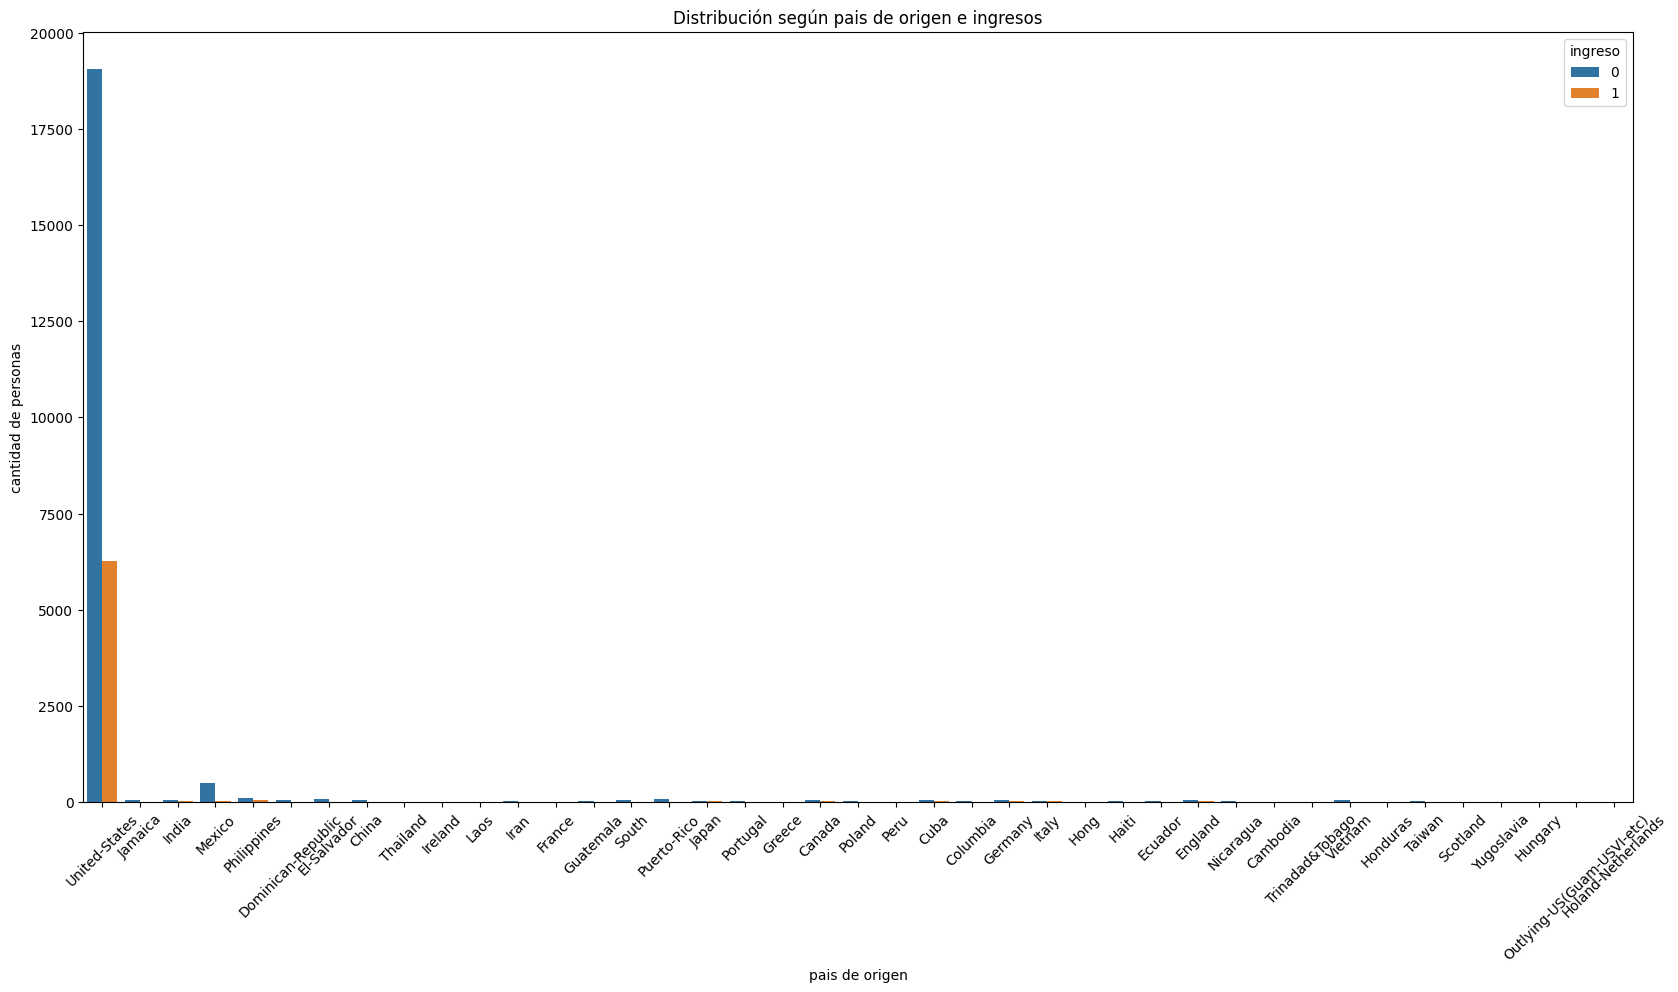

In [ ]:
#gráfico '#gráfico 'native.country' vs 'income'
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='native.country', hue='income')
plt.title('Distribución según pais de origen e ingresos')
plt.xlabel('pais de origen')
plt.ylabel('cantidad de personas')
plt.xticks(rotation=45)
plt.legend(title='ingreso')
plt.show()

Al tratarse de un dataset de un censo en EEUU, este pais es el mayoritario en número total de personas encuestadas y en número total de personas que tienen un salario mayor o igual a 50 mil dólares anuales.

Decido eliminar la columna de pais de origen para no agrandar el dataset en columnas al codificar los valores de esta categoría, siendo que la mayoría de las personas son de EEUU.

In [ ]:
#Elimino la columna native.country
df_sin_country = df.drop(columns=['native.country'])

In [ ]:
df_sin_country.head()

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,...,hours.per.week,income,ID,workclass_codificada,education_codificada,marital_status_codificada,occupation_codificada,relationship_codificada,race_codificada,sex_codificada
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,...,32,0,24451,1,11,0,10,3,4,0
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,40,1,985,3,9,2,3,5,4,0
2,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,...,60,1,30229,3,11,2,2,0,4,1
3,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,...,60,1,7107,3,9,2,9,0,4,1
4,27656,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,...,40,0,27639,3,11,4,3,1,4,0


# **Análisis de variables cuantitativas**

In [ ]:
#Análisis de variables cuantitativas
df_sin_country.describe()

,index,age,education.num,capital.gain,capital.loss,hours.per.week,income,ID,workclass_codificada,education_codificada,marital_status_codificada,occupation_codificada,relationship_codificada,race_codificada,sex_codificada
count,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000
mean,16274.894851,38.610356,10.093506,1099.991503,88.284387,40.446666,0.242371,16267.565736,3.096218,10.320328,2.612308,6.121456,1.450499,3.665714,0.669692
std,9410.041750,13.659928,2.566083,7487.323462,405.821328,12.369212,0.428525,9403.092602,1.110085,3.861043,1.506728,3.978595,1.608918,0.848804,0.470332
min,0.000000,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8104.750000,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000,8104.750000,3.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000
50%,16296.000000,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000,16291.000000,3.000000,11.000000,2.000000,6.000000,1.000000,4.000000,1.000000
75%,24431.250000,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000,24416.250000,3.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000
max,32559.000000,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000,32535.000000,7.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000


Variables cuantitativas:

Edad: 38.6 +/- 13.6 años Outlier 90 años

Education.num: 10.09 +/- 2.56

Capital.gain: 1099.9 +/- 7487.32

Capital.loss: 88.28 +/- 405.8

Horas por semana: 40.4 +/- 12.36

In [ ]:
#muestro la columna capital.loss y capital.gain
df_sin_country[['capital.loss', 'capital.gain']].head(20)

,capital.loss,capital.gain
0,0,0
1,1848,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,7688
9,0,0


In [ ]:
df_sin_country['capital.loss'].value_counts()

capital.loss
0       26357
1902      173
1977      142
1887      135
1848       44
        ...  
1138        1
2489        1
3770        1
974         1
2282        1
Name: count, Length: 88, dtype: int64

In [ ]:
#Qué porcentaje de los datos representan los valores '0' en esa columna
valores_cero = (df_sin_country['capital.loss'] == 0).sum()
porcentaje_ceros = (valores_cero / 27656) * 100
print(porcentaje_ceros)

95.3030083887764


A simple vista la columna capital.loss presenta muchos valores "0". Calculo qué porcentaje de los datos están representados por ese valor y encuentro que el 95% de la columna tiene ese número.

In [ ]:
df_sin_country['capital.gain'].value_counts()

capital.gain
0        25345
15024      308
7688       245
7298       208
99999      139
         ...  
5060         1
3456         1
1455         1
2538         1
22040        1
Name: count, Length: 118, dtype: int64

In [ ]:
#Qué porcentaje de los datos representan los valores '0' en esa columna
valores_cero = (df_sin_country['capital.gain'] == 0).sum()
porcentaje_ceros = (valores_cero / 27656) * 100
print(porcentaje_ceros)

91.64376627133353


Misma situación en la columna 'capital.gain'. En este caso el valor cero está en el 91.6% de las casillas.

Al ser porcentajes tan elevados de valores cero, elijo eliminar ambas columnas para no sesgar el resultado.



In [ ]:
#Elimino columnas que que considero innecesarias
columnas_a_eliminar = ['capital.loss', 'capital.gain', 'index', 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'sex', 'race']
df_limpio = df_sin_country.drop(columnas_a_eliminar, axis=1)
df_limpio.head()

,age,education.num,hours.per.week,income,ID,workclass_codificada,education_codificada,marital_status_codificada,occupation_codificada,relationship_codificada,race_codificada,sex_codificada
0,30,9,32,0,24451,1,11,0,10,3,4,0
1,37,13,40,1,985,3,9,2,3,5,4,0
2,41,9,60,1,30229,3,11,2,2,0,4,1
3,45,13,60,1,7107,3,9,2,9,0,4,1
4,28,9,40,0,27639,3,11,4,3,1,4,0


In [ ]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27656 entries, 0 to 27655
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        27656 non-null  int64
 1   education.num              27656 non-null  int64
 2   hours.per.week             27656 non-null  int64
 3   income                     27656 non-null  int64
 4   ID                         27656 non-null  int64
 5   workclass_codificada       27656 non-null  int64
 6   education_codificada       27656 non-null  int64
 7   marital_status_codificada  27656 non-null  int64
 8   occupation_codificada      27656 non-null  int64
 9   relationship_codificada    27656 non-null  int64
 10  race_codificada            27656 non-null  int64
 11  sex_codificada             27656 non-null  int64
dtypes: int64(12)
memory usage: 2.5 MB


Quiero ver qué comportamiento tienen las variables cuantitativas (Edad, Education.num, Horas por semana) con respecto al ingreso



<ipython-input-119-92a63bf3e81b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio_cuantitativas['target'] = df_limpio['income']


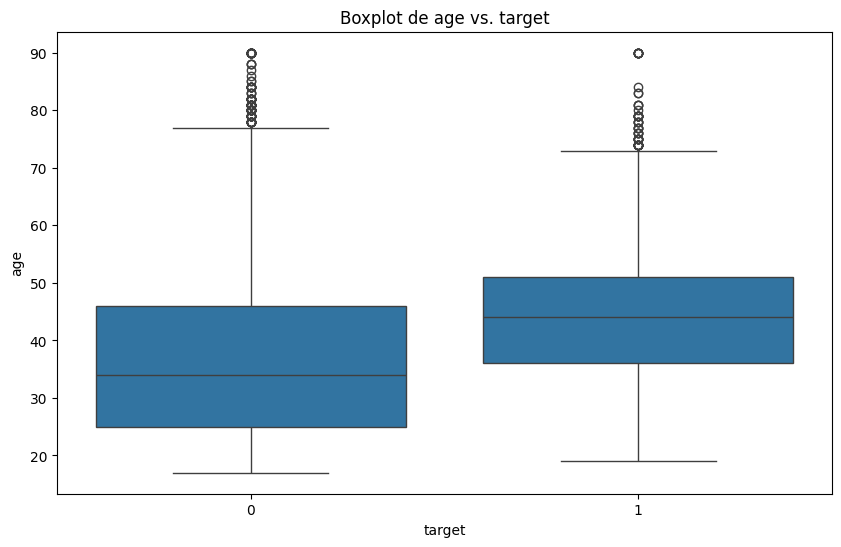

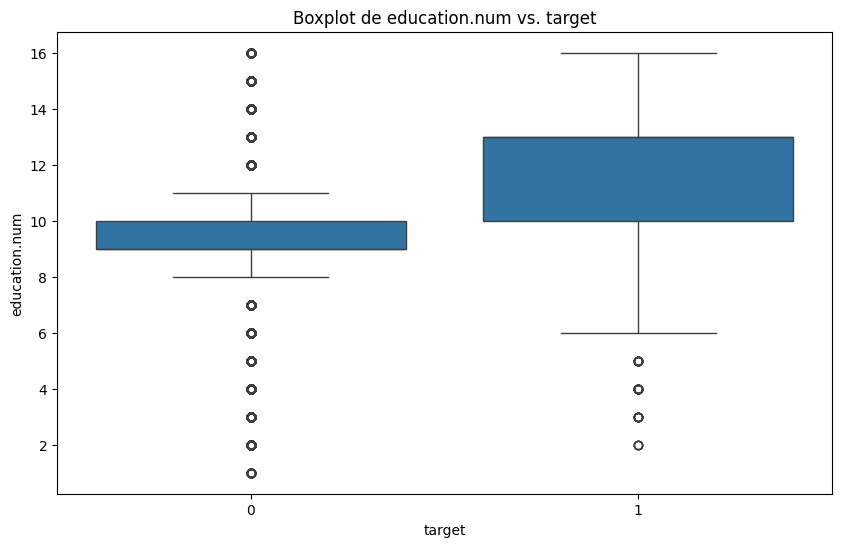

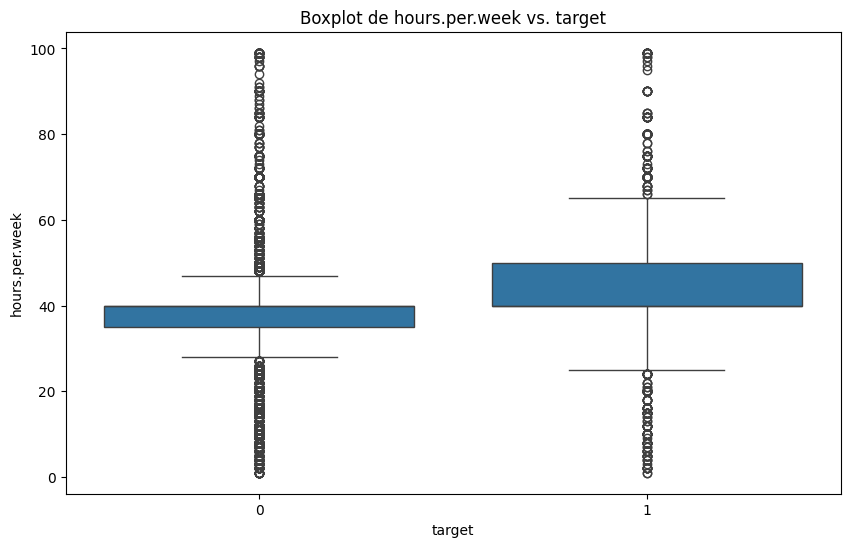

In [ ]:
# Selecciono las columnas cuantitativas
df_limpio_cuantitativas = df_limpio[['age', 'education.num', 'hours.per.week']]

# Agrego la columna target a df_limpio_cuantitativas ('income')
df_limpio_cuantitativas['target'] = df_limpio['income']

# Creo boxplots para cada variable cuantitativa vs. target
for column in df_limpio_cuantitativas.columns[:-1]:  # Excluyendo la columna 'target'
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='target', y=column, data=df_limpio_cuantitativas)
    plt.title(f'Boxplot de {column} vs. target')
    plt.show()

En los gráficos arrojados se puede observar que dentro de las personas que tienen ingresos mayores o iguales a 50 mil dólares anuales, la edad promedio es más elevada que en los que reciben mayores ingresos.


En cuanto al education.num, en el grupo con ingresos superiores o iguales a los 50 mil dólares anuales puede observarse mayores valores de esta variable.


Si se evaluan las horas por semana, el grupo que recibe ingresos mayores o iguales a 50 mil dólares trabaja más horas por semana.

Ahora escalo las variables y entreno el modelo


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tree

In [ ]:
# Indico cuál es la variable target del df
df_limpio['target'] = df_limpio['income']

# Divido el conjunto de datos en características (X) y variable objetivo (y)
X = df_limpio.drop('income', axis=1)
y = df_limpio['target']

# Divido el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('número de muestras en y', np.bincount(y))
print('número de muestras en y_train', np.bincount(y_train))
print('número de muestras en y_test', np.bincount(y_test))




número de muestras en y [20953  6703]
número de muestras en y_train [16782  5342]
número de muestras en y_test [4171 1361]


In [ ]:
# Escalo las variables
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Instanciar el modelo DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=1)

# Entreno el modelo con los datos escalados
dt_clf.fit(X_train_scaled, y_train)




DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)

In [ ]:
# Realizo predicciones en el conjunto de prueba
y_pred = dt_clf.predict(X_test_scaled)

In [ ]:
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
accuracy_score(y_test, y_pred)

1.0

In [ ]:
# Evaluo el modelo
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[4171    0]
 [   0 1361]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4171
           1       1.00      1.00      1.00      1361

    accuracy                           1.00      5532
   macro avg       1.00      1.00      1.00      5532
weighted avg       1.00      1.00      1.00      5532



[Text(0.5, 0.75, 'x[11] <= 0.604\nentropy = 0.797\nsamples = 22124\nvalue = [16782, 5342]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 16782\nvalue = [16782, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 5342\nvalue = [0, 5342]')]

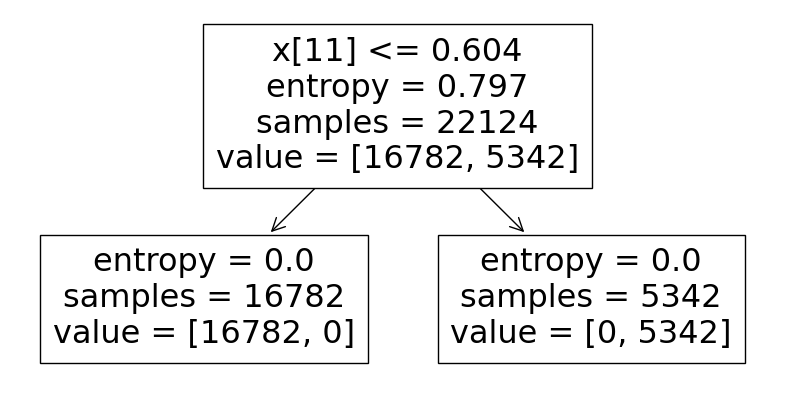

In [ ]:
 #Visualización del árbol de decisión
plt.figure(figsize=(10,5))
sklearn.tree.plot_tree(dt_clf, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, impurity=True, node_ids=False, proportion=False, rounded=False, precision=3, ax=None, fontsize=None)


Hay 'overfit' en el modelo. Pruebo con randomforest

In [ ]:
# Indico cuál es la variable target del df
df_limpio['target'] = df_limpio['income']

# Divido el conjunto de datos en características (X) y variable objetivo (y)
X = df_limpio.drop('income', axis=1)
y = df_limpio['target']

In [ ]:
# Divido el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=65)

print('número de muestras en y', np.bincount(y))
print('número de muestras en y_train', np.bincount(y_train))
print('número de muestras en y_test', np.bincount(y_test))

número de muestras en y [20953  6703]
número de muestras en y_train [14633  4726]
número de muestras en y_test [6320 1977]


In [ ]:
# Escalo las variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Instanciar el modelo DecisionTreeClassifier
rf_clf = RandomForestClassifier(criterion='entropy', n_estimators=25, max_depth=2, min_samples_split=10, min_samples_leaf=20, random_state=42, max_features='sqrt')

# Entreno el modelo con los datos escalados
rf_clf.fit(X_train_scaled, y_train)



RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=20,
                       min_samples_split=10, n_estimators=25, random_state=42)

In [ ]:
# Realizo predicciones en el conjunto de prueba
y_pred = rf_clf.predict(X_test_scaled)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
accuracy_score(y_test, y_pred)

0.9979510666505966

In [ ]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[6320    0]
 [  17 1960]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6320
           1       1.00      0.99      1.00      1977

    accuracy                           1.00      8297
   macro avg       1.00      1.00      1.00      8297
weighted avg       1.00      1.00      1.00      8297



Con Random Forest hay overfit como con el árbol de decisión. Elijo max_depth =2, n_stimators=25 porque es el valor con el que el accuracy es menor a 1.



In [ ]:
#Guardo el modelo
import joblib
joblib.dump(rf_clf,'modelo_entrenado.pkl')

['modelo_entrenado.pkl']

# **Empiezo a trabajar sobre el nuevo dataset de test**

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/test - test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           4881 non-null   int64 
 1   age             4881 non-null   int64 
 2   workclass       4881 non-null   object
 3   education       4881 non-null   object
 4   education.num   4881 non-null   int64 
 5   marital.status  4881 non-null   object
 6   occupation      4881 non-null   object
 7   relationship    4881 non-null   object
 8   race            4881 non-null   object
 9   sex             4881 non-null   object
 10  capital.gain    4881 non-null   int64 
 11  capital.loss    4881 non-null   int64 
 12  hours.per.week  4881 non-null   int64 
 13  native.country  4881 non-null   object
 14  ID              4881 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 572.1+ KB


In [ ]:
#Acondiciono el dataset para poder aplicarle el modelo predictivo
df_test['workclass'].value_counts()


workclass
Private             3394
Self-emp-not-inc     384
Local-gov            324
?                    297
State-gov            181
Self-emp-inc         163
Federal-gov          138
Name: count, dtype: int64

In [ ]:
#Reemplazo los valores "?" por NaN para que sea más fácil operar con ellos
df_test['workclass'] = df_test['workclass'].replace('?', np.nan)
print(df_test['workclass'].isnull().sum())


#Qué porcentaje de los datos representan los nulos en esa columna
valores_faltantes = df_test['workclass'].isnull().sum()
porcentaje_faltantes = (valores_faltantes / 4881) * 100
print(porcentaje_faltantes)

297
6.084818684695759


In [ ]:
# Imputo valores faltantes en la columna 'workclass' con la moda
moda_workclass = df_test['workclass'].mode()[0]
df_test['workclass'].fillna(moda_workclass, inplace=True)
df_test['workclass'].value_counts()

workclass
Private             3691
Self-emp-not-inc     384
Local-gov            324
State-gov            181
Self-emp-inc         163
Federal-gov          138
Name: count, dtype: int64

In [ ]:
#Codifico los valores de la variable para su posterior tratamiento

label_encoder = LabelEncoder()
df_test['workclass_codificada'] = label_encoder.fit_transform(df_test['workclass'])
df_test['workclass_codificada'].value_counts()

workclass_codificada
2    3691
4     384
1     324
5     181
3     163
0     138
Name: count, dtype: int64

In [ ]:
df_test['education'].value_counts()

education
HS-grad         1560
Some-college    1059
Bachelors        770
Masters          248
Assoc-voc        235
11th             193
Assoc-acdm       181
10th             139
7th-8th          110
9th               85
Prof-school       81
12th              68
Doctorate         61
5th-6th           57
1st-4th           27
Preschool          7
Name: count, dtype: int64

In [ ]:
#Codifico los valores de la variable para su posterior tratamiento

label_encoder = LabelEncoder()
df_test['education_codificada'] = label_encoder.fit_transform(df_test['education'])
df_test['education_codificada'].value_counts()

education_codificada
11    1560
15    1059
9      770
12     248
8      235
1      193
7      181
0      139
5      110
6       85
14      81
2       68
10      61
4       57
3       27
13       7
Name: count, dtype: int64

In [ ]:
df_test['marital.status'].value_counts()

marital.status
Married-civ-spouse       2250
Never-married            1602
Divorced                  671
Separated                 168
Widowed                   136
Married-spouse-absent      52
Married-AF-spouse           2
Name: count, dtype: int64

In [ ]:
#Codifico los valores de la variable para su posterior tratamiento

label_encoder = LabelEncoder()
df_test['marital_status_codificada'] = label_encoder.fit_transform(df_test['marital.status'])
df_test['marital_status_codificada'].value_counts()

marital_status_codificada
2    2250
4    1602
0     671
5     168
6     136
3      52
1       2
Name: count, dtype: int64

In [ ]:
df_test['occupation'].value_counts()

occupation
Exec-managerial      615
Prof-specialty       597
Craft-repair         585
Sales                585
Adm-clerical         531
Other-service        517
Machine-op-inspct    308
?                    297
Transport-moving     219
Handlers-cleaners    207
Tech-support         160
Farming-fishing      139
Protective-serv       92
Priv-house-serv       27
Armed-Forces           2
Name: count, dtype: int64

In [ ]:
#Reemplazo los valores "?" por NaN para que sea más fácil operar con ellos
df_test['occupation'] = df_test['occupation'].replace('?', np.nan)
print(df_test['occupation'].isnull().sum())


#Qué porcentaje de los datos representan los nulos en esa columna
valores_faltantes = df_test['occupation'].isnull().sum()
porcentaje_faltantes = (valores_faltantes / 4881) * 100
print(porcentaje_faltantes)

297
6.084818684695759


In [ ]:
# Imputo valores faltantes en la columna 'occupation' con la moda
moda_occupation_test = df_test['occupation'].mode()[0]
df_test['occupation'].fillna(moda_occupation_test, inplace=True)
df_test['occupation'].value_counts()

occupation
Exec-managerial      912
Prof-specialty       597
Craft-repair         585
Sales                585
Adm-clerical         531
Other-service        517
Machine-op-inspct    308
Transport-moving     219
Handlers-cleaners    207
Tech-support         160
Farming-fishing      139
Protective-serv       92
Priv-house-serv       27
Armed-Forces           2
Name: count, dtype: int64

In [ ]:
#Codifico los valores de la variable para su posterior tratamiento

label_encoder = LabelEncoder()
df_test['occupation_codificada'] = label_encoder.fit_transform(df_test['occupation'])
df_test['occupation_codificada'].value_counts()

occupation_codificada
3     912
9     597
2     585
11    585
0     531
7     517
6     308
13    219
5     207
12    160
4     139
10     92
8      27
1       2
Name: count, dtype: int64

In [ ]:
df_test['relationship'].value_counts()

relationship
Husband           1979
Not-in-family     1291
Own-child          731
Unmarried          501
Wife               235
Other-relative     144
Name: count, dtype: int64

In [ ]:
#Codifico los valores de la variable para su posterior tratamiento

label_encoder = LabelEncoder()
df_test['relationship_codificada']= label_encoder.fit_transform(df_test['relationship'])
df_test['relationship_codificada'].value_counts()

relationship_codificada
0    1979
1    1291
3     731
4     501
5     235
2     144
Name: count, dtype: int64

In [ ]:
df_test['sex'].value_counts()

sex
Male      3254
Female    1627
Name: count, dtype: int64

In [ ]:
#Codifico los valores de la variable para su posterior tratamiento

label_encoder = LabelEncoder()
df_test['sex_codificada']= label_encoder.fit_transform(df_test['sex'])
df_test['sex_codificada'].value_counts()

sex_codificada
1    3254
0    1627
Name: count, dtype: int64

In [ ]:
df_test['race'].value_counts()

race
White                 4174
Black                  473
Asian-Pac-Islander     152
Amer-Indian-Eskimo      48
Other                   34
Name: count, dtype: int64

In [ ]:
#Codifico los valores de la variable para su posterior tratamiento

label_encoder = LabelEncoder()
df_test['race_codificada']= label_encoder.fit_transform(df_test['race'])
df_test['race_codificada'].value_counts()

race_codificada
4    4174
2     473
1     152
0      48
3      34
Name: count, dtype: int64

In [ ]:
#Elimino columnas que que considero innecesarias
columnas_a_eliminar = ['capital.loss', 'capital.gain', 'index', 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'sex', 'native.country', 'race']
df_test_limpio = df_test.drop(columnas_a_eliminar, axis=1)
df_test_limpio.head()

,age,education.num,hours.per.week,ID,workclass_codificada,education_codificada,marital_status_codificada,occupation_codificada,relationship_codificada,sex_codificada,race_codificada
0,53,10,40,3643,2,15,2,6,0,1,4
1,18,7,25,16036,2,1,4,3,3,1,4
2,42,10,37,9401,2,15,2,6,5,0,4
3,49,16,60,17903,3,10,2,9,0,1,2
4,58,13,40,5198,1,9,2,9,5,0,4


In [ ]:
df_test_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        4881 non-null   int64
 1   education.num              4881 non-null   int64
 2   hours.per.week             4881 non-null   int64
 3   ID                         4881 non-null   int64
 4   workclass_codificada       4881 non-null   int64
 5   education_codificada       4881 non-null   int64
 6   marital_status_codificada  4881 non-null   int64
 7   occupation_codificada      4881 non-null   int64
 8   relationship_codificada    4881 non-null   int64
 9   sex_codificada             4881 non-null   int64
 10  race_codificada            4881 non-null   int64
dtypes: int64(11)
memory usage: 419.6 KB


In [ ]:
#aplico el modelo al dataset test
clf = joblib.load('/content/drive/MyDrive/modelo_entrenado.pkl')

In [ ]:
data = df_test_limpio

# Asegurarse de que las características coincidan
missing_cols = set(X_train.columns) - set(data.columns)
for c in missing_cols:
    data[c] = 0

data_preprocessed = data[X_train.columns]



In [ ]:
# Hacer predicciones con el modelo cargado
nuevas_predicciones = clf.predict(data_preprocessed)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# Mostrar las predicciones
print(nuevas_predicciones)

[0 0 0 ... 0 0 0]


In [ ]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[6320    0]
 [  17 1960]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6320
           1       1.00      0.99      1.00      1977

    accuracy                           1.00      8297
   macro avg       1.00      1.00      1.00      8297
weighted avg       1.00      1.00      1.00      8297



El modelo fue aplicado al nuevo dataset aunque se sigue observando overfit.

In [ ]:
df_pred = pd.DataFrame(nuevas_predicciones)
df_pred.head()


,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
#cambio el nombre a la columna '0'
df_pred.columns = ['PRED']
df_pred.head()

,PRED
0,0
1,0
2,0
3,0
4,0


In [ ]:
from operator import index
#agrego columna con 'id'
df_pred['ID'] = df_test_limpio['ID']
df_pred.head()

,PRED,ID
0,0,3643
1,0,16036
2,0,9401
3,0,17903
4,0,5198


In [ ]:
df_pred.to_csv("predicciones_test.csv", header=True, index=False)